# **생능 출판사 "으뜸 데이터 분석과 머신러닝"(개정판) 교재의 소스 코드**
## *6장 엑셀보다 판다스*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민, 김병욱
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.


### 6.1 엑셀보다 빠르고 강력한 판다스

### 6.2 시리즈와 자료형과 결손값

In [ ]:
import numpy as np
import pandas as pd

se = pd.Series([1, 2, np.nan, 4])   # np.nan은 결측값
se

,0
0,1.0
1,2.0
2,NaN
3,4.0


In [ ]:
se.isna()    # np.nan이 포함된 세번째 항목만 True를 반환

,0
0,False
1,False
2,True
3,False


In [ ]:
se[0], se[1]

(1.0, 2.0)

In [ ]:
import pandas as pd
import numpy as np

data = [1, 2, np.nan, 4]
indexed_se = pd.Series(data, index = ['a', 'b', 'c', 'd'])
print(indexed_se)

a    1.0
b    2.0
c    NaN
d    4.0
dtype: float64


In [ ]:
indexed_se['a'], indexed_se['b']  # 인덱스가 'a', 'b',.. 임

(1.0, 2.0)

### 6.3 판다스의 기본 구조인 시리즈와 데이터프레임

In [ ]:
import pandas as pd
import numpy as np

income = {'1월' : 9500, '2월': 6200, '3월': 6050, '4월': 7000}
income_se = pd.Series(income)   #월을 인덱스로 하는 매출 시리즈
print('동윤이네 상점의 수익')
print(income_se)

동윤이네 상점의 수익
1월    9500
2월    6200
3월    6050
4월    7000
dtype: int64


In [ ]:
month_se = pd.Series(['1월', '2월', '3월', '4월'])
income_se = pd.Series([9500, 6200, 6050, 7000])
expenses_se = pd.Series([5040, 2350, 2300, 4800])
df = pd.DataFrame( {'월': month_se, '수익': income_se,
                   '지출' : expenses_se})
df    # print(df)를 이용해서 출력형식을 비교해 보자

,월,수익,지출
0,1월,9500,5040
1,2월,6200,2350
2,3월,6050,2300
3,4월,7000,4800


In [ ]:
print(df)

    월    수익    지출
0  1월  9500  5040
1  2월  6200  2350
2  3월  6050  2300
3  4월  7000  4800


In [ ]:
# 판다스 Series를 이용하여 최대 수익 월을 출력하기
m_idx = np.argmax(income_se)  # 넘파이의 argmax() 사용
print('최대 수익이 발생한 월:', month_se[m_idx])

최대 수익이 발생한 월: 1월


In [ ]:
print('월 최대 수익:', income_se.max(),\
      ', 월 평균 수익:', income_se.mean())

월 최대 수익: 9500 , 월 평균 수익: 7187.5


### 6.4 csv 데이터를 읽고 확인하기

In [ ]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'vehicle_prod.csv'
df = pd.read_csv(file)   # 원격지에 접속하여 csv를 읽어옴

In [ ]:
print(df)

  Unnamed: 0   2007   2008   2009   2010   2011
0      China   7.71   7.95  11.96  15.84  16.33
1         EU  19.02  17.71  15.00  16.70  17.48
2         US  10.47   8.45   5.58   7.60   8.40
3      Japan  10.87  10.83   7.55   9.09   7.88
4      Korea   4.04   3.78   3.45   4.20   4.62
5     Mexico   2.01   2.05   1.50   2.25   2.54


### 6.5 데이터프레임의 구조

In [ ]:
df = pd.read_csv(file, index_col = 0)
print(df)

         2007   2008   2009   2010   2011
China    7.71   7.95  11.96  15.84  16.33
EU      19.02  17.71  15.00  16.70  17.48
US      10.47   8.45   5.58   7.60   8.40
Japan   10.87  10.83   7.55   9.09   7.88
Korea    4.04   3.78   3.45   4.20   4.62
Mexico   2.01   2.05   1.50   2.25   2.54


In [ ]:
df.columns   # 데이터프레임의 컬럼값들을 살펴보자

Index(['2007', '2008', '2009', '2010', '2011'], dtype='object')

In [ ]:
df.index     # 데이터프레임의 인덱스값들을 살펴보자

Index(['China', 'EU', 'US', 'Japan', 'Korea', 'Mexico'], dtype='object')

In [ ]:
df['2007']   # 데이터프레임의 2007년도 컬럼값들을 살펴보자

,2007
China,7.71
EU,19.02
US,10.47
Japan,10.87
Korea,4.04
Mexico,2.01


In [ ]:
df.columns.tolist()

['2007', '2008', '2009', '2010', '2011']

In [ ]:
df['2007'].tolist()

[7.71, 19.02, 10.47, 10.87, 4.04, 2.01]

### NOTE - 주피터 노트북의 데이터프레임 표시방법

In [ ]:
df = pd.read_csv(file, index_col = 0)
df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


### 6.6 새로운 열을 생성하자

In [ ]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'vehicle_prod.csv'
df = pd.read_csv(file, index_col=0)   # 원격지에 접속하여 csv를 읽어옴

df['total'] = df.sum(axis = 1)
print(df)

         2007   2008   2009   2010   2011  total
China    7.71   7.95  11.96  15.84  16.33  59.79
EU      19.02  17.71  15.00  16.70  17.48  85.91
US      10.47   8.45   5.58   7.60   8.40  40.50
Japan   10.87  10.83   7.55   9.09   7.88  46.22
Korea    4.04   3.78   3.45   4.20   4.62  20.09
Mexico   2.01   2.05   1.50   2.25   2.54  10.35


In [ ]:
# 2008년부터 2011년도 까지의 총 생산 대수와 평균을 다시 계산함
df['total'] = df[['2007', '2008', '2009', '2010', '2011']].sum(axis=1)
df['mean'] = df[['2007', '2008', '2009', '2010', '2011']].mean(axis=1)
print(df)

         2007   2008   2009   2010   2011  total    mean
China    7.71   7.95  11.96  15.84  16.33  59.79  11.958
EU      19.02  17.71  15.00  16.70  17.48  85.91  17.182
US      10.47   8.45   5.58   7.60   8.40  40.50   8.100
Japan   10.87  10.83   7.55   9.09   7.88  46.22   9.244
Korea    4.04   3.78   3.45   4.20   4.62  20.09   4.018
Mexico   2.01   2.05   1.50   2.25   2.54  10.35   2.070


In [ ]:
df.drop('2007', inplace=True, axis=1)
print(df)       # 이전에 구한 total, mean 값이 나타남

         2008   2009   2010   2011  total    mean
China    7.95  11.96  15.84  16.33  59.79  11.958
EU      17.71  15.00  16.70  17.48  85.91  17.182
US       8.45   5.58   7.60   8.40  40.50   8.100
Japan   10.83   7.55   9.09   7.88  46.22   9.244
Korea    3.78   3.45   4.20   4.62  20.09   4.018
Mexico   2.05   1.50   2.25   2.54  10.35   2.070


In [ ]:
# 2008년부터 2011년도 까지의 총 생산대수와 평균을 다시 계산함
df['total'] = df[['2008', '2009', '2010', '2011']].sum(axis=1)
df['mean'] = df[['2008', '2009', '2010', '2011']].mean(axis=1)
print(df)       # 새로 계산한 total, mean 값이 나타남

         2008   2009   2010   2011  total     mean
China    7.95  11.96  15.84  16.33  52.08  13.0200
EU      17.71  15.00  16.70  17.48  66.89  16.7225
US       8.45   5.58   7.60   8.40  30.03   7.5075
Japan   10.83   7.55   9.09   7.88  35.35   8.8375
Korea    3.78   3.45   4.20   4.62  16.05   4.0125
Mexico   2.05   1.50   2.25   2.54   8.34   2.0850


In [ ]:
# 2008년부터 2011년도 까지의 총 판매대수와 평균을 다시 계산함
df['total'] = df[['2008', '2009', '2010', '2011']].sum(axis=1)
df['mean'] = df[['2008', '2009', '2010', '2011']].mean(axis=1)
print(df)

         2008   2009   2010   2011  total     mean
China    7.95  11.96  15.84  16.33  52.08  13.0200
EU      17.71  15.00  16.70  17.48  66.89  16.7225
US       8.45   5.58   7.60   8.40  30.03   7.5075
Japan   10.83   7.55   9.09   7.88  35.35   8.8375
Korea    3.78   3.45   4.20   4.62  16.05   4.0125
Mexico   2.05   1.50   2.25   2.54   8.34   2.0850


### 6.7 inplace로 데이터프레임 갱신하기

In [ ]:
import pandas as pd

d_df = pd.DataFrame(data = [[10, 20, 30, 40], [50, 60, 70, 80]],
                 columns = ['A', 'B', 'C', 'D'])
new_df = d_df.drop('B', axis=1, inplace=False)
print(new_df)    # 'B'열이 삭제된 새로운 데이터프레임

    A   C   D
0  10  30  40
1  50  70  80


In [ ]:
print(d_df)         # d_df 데이터프레임은 변화가 없음

    A   B   C   D
0  10  20  30  40
1  50  60  70  80


In [ ]:
d_df.drop('B', axis=1, inplace=True) # inplace 키워드 인자가 True
print(d_df)   # d_df 데이터프레임 내부의 값이 변경됨

    A   C   D
0  10  30  40
1  50  70  80


In [ ]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'vehicle_prod.csv'
df = pd.read_csv(file, index_col=0)   # 원격지에 접속하여 csv를 읽어옴
print(df)

         2007   2008   2009   2010   2011
China    7.71   7.95  11.96  15.84  16.33
EU      19.02  17.71  15.00  16.70  17.48
US      10.47   8.45   5.58   7.60   8.40
Japan   10.87  10.83   7.55   9.09   7.88
Korea    4.04   3.78   3.45   4.20   4.62
Mexico   2.01   2.05   1.50   2.25   2.54


In [ ]:
path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'vehicle_prod.csv'
df = pd.read_csv(file, index_col=0)   # 원격지에 접속하여 csv를 읽어옴

df.drop('Mexico', axis=0, inplace=True) # Mexico행을 삭제하고 df를 갱신
print(df)

        2007   2008   2009   2010   2011
China   7.71   7.95  11.96  15.84  16.33
EU     19.02  17.71  15.00  16.70  17.48
US     10.47   8.45   5.58   7.60   8.40
Japan  10.87  10.83   7.55   9.09   7.88
Korea   4.04   3.78   3.45   4.20   4.62


### 6.8 데이터프레임 시각화

In [ ]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'vehicle_prod.csv'

df = pd.read_csv(file, index_col = 0)
df_no_index = pd.read_csv(file)
print(df['2007'])
print(df_no_index['2007'])

China      7.71
EU        19.02
US        10.47
Japan     10.87
Korea      4.04
Mexico     2.01
Name: 2007, dtype: float64
0     7.71
1    19.02
2    10.47
3    10.87
4     4.04
5     2.01
Name: 2007, dtype: float64


In [ ]:
print(df[['2007', '2008', '2009']])

         2007   2008   2009
China    7.71   7.95  11.96
EU      19.02  17.71  15.00
US      10.47   8.45   5.58
Japan   10.87  10.83   7.55
Korea    4.04   3.78   3.45
Mexico   2.01   2.05   1.50


<Axes: >

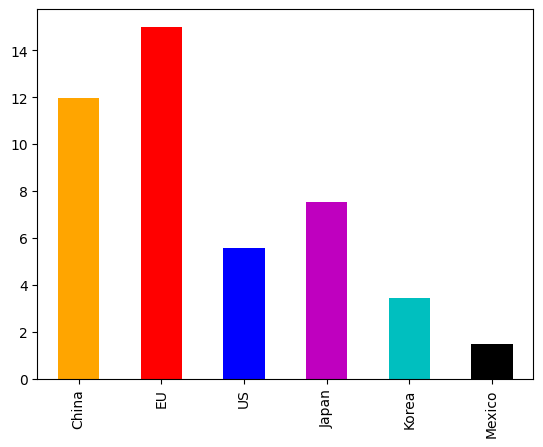

In [ ]:
df['2009'].plot(kind='bar', color=('orange','r', 'b', 'm', 'c', 'k'))

<Axes: ylabel='2009'>

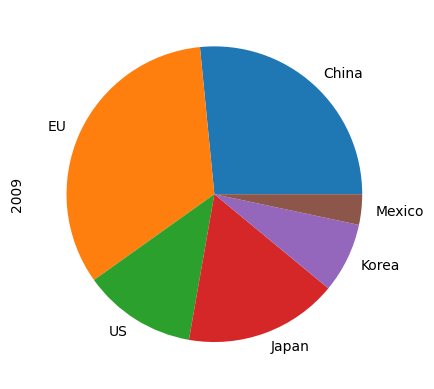

In [ ]:
df['2009'].plot(kind='pie')

### 6.9 편리하고 강력한 시각화

<Axes: >

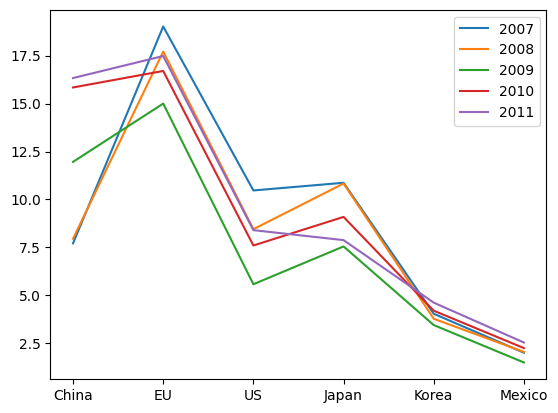

In [ ]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'vehicle_prod.csv'
df = pd.read_csv(file, index_col=0)   # 원격지에 접속하여 csv를 읽어옴
df.plot.line()

<Axes: >

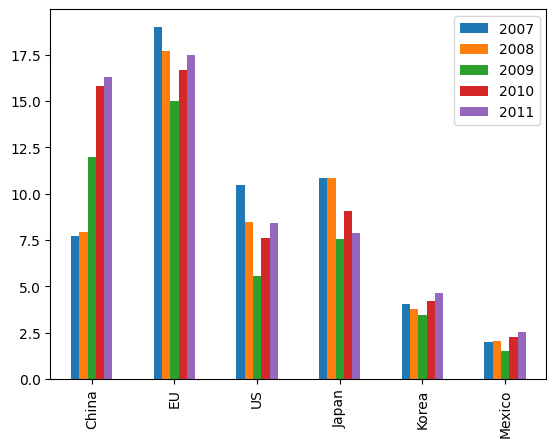

In [ ]:
df.plot.bar()

In [ ]:
df = df.transpose()  # df = df.T도 가능함
#df = df.T
print(df)

      China     EU     US  Japan  Korea  Mexico
2007   7.71  19.02  10.47  10.87   4.04    2.01
2008   7.95  17.71   8.45  10.83   3.78    2.05
2009  11.96  15.00   5.58   7.55   3.45    1.50
2010  15.84  16.70   7.60   9.09   4.20    2.25
2011  16.33  17.48   8.40   7.88   4.62    2.54


<Axes: >

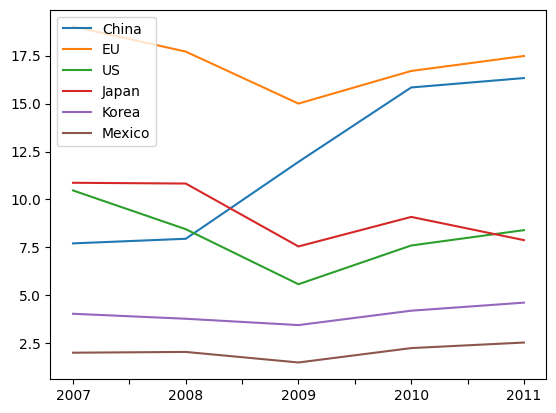

In [ ]:
df.plot.line()

### 6.10 편리한 데이터 다루기 - 슬라이싱과 인덱싱

In [ ]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'vehicle_prod.csv'
df = pd.read_csv(file, index_col=0)   # 원격지에 접속하여 csv를 읽어옴
df.head(3)     # 첫 3행의 정보를 가져온다

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40


In [ ]:
df[2:6]

,2007,2008,2009,2010,2011
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [ ]:
df.loc['Korea']

,Korea
2007,4.04
2008,3.78
2009,3.45
2010,4.20
2011,4.62


In [ ]:
df.loc[['US', 'Korea']]  # 주의: df.loc['US','Korea']는 오류

,2007,2008,2009,2010,2011
US,10.47,8.45,5.58,7.6,8.40
Korea,4.04,3.78,3.45,4.2,4.62


In [ ]:
df['2011'][[0, 4]]

<ipython-input-45-98c7b29a15bd>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['2011'][[0, 4]]


,2011
China,16.33
Korea,4.62


In [ ]:
df.loc['Korea', '2011']

4.62

### 6.11 loc, iloc 인덱서

In [ ]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'vehicle_prod.csv'

In [ ]:
df = pd.read_csv(file, index_col=0)   # 원격지에 접속하여 csv를 읽어옴
df.head(3)['2009']     # 첫 3행의 정보를 가져온다

,2009
China,11.96
EU,15.00
US,5.58


In [ ]:
df.iloc[4]  # df.loc['Korea'] 와 동일함, df.iloc['Korea']는 오류

,Korea
2007,4.04
2008,3.78
2009,3.45
2010,4.20
2011,4.62


In [ ]:
df.loc['Korea']

,Korea
2007,4.04
2008,3.78
2009,3.45
2010,4.20
2011,4.62


In [ ]:
df.iloc['Korea'] # 오류

TypeError: ignored

In [ ]:
df.loc[['US','Korea']]  # 주의 :df.loc['US','Korea']는 오류

,2007,2008,2009,2010,2011
US,10.47,8.45,5.58,7.6,8.40
Korea,4.04,3.78,3.45,4.2,4.62


In [ ]:
df.loc['US','Korea'].  # 오류 발생

SyntaxError: invalid syntax (<ipython-input-52-66bef0611d7c>, line 1)

In [ ]:
df.iloc[[2, 4]]  # 주의: df.iloc[2, 4]는 US행의 2011년 데이터임

,2007,2008,2009,2010,2011
US,10.47,8.45,5.58,7.6,8.40
Korea,4.04,3.78,3.45,4.2,4.62


In [ ]:
df.iloc[2, 4]  # US행의 2011년 데이터를 출력

8.4

In [ ]:
df.iloc[2:4]     # US행, Japan행의 데이터를 출력

,2007,2008,2009,2010,2011
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88


In [ ]:
df.iloc[[2, 3]]    # US행, Japan행의 데이터를 출력

,2007,2008,2009,2010,2011
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88


In [ ]:
df[2:4]             # US행, Japan행의 데이터를 출력

,2007,2008,2009,2010,2011
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88


### 6.12 판다스를 이용한 기상 데이터 분석

In [ ]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path + 'weather.csv'

weather = pd.read_csv(weather_file, index_col = 0, encoding='CP949')
print(weather.head(3))
print('weather 데이터의 shape :', weather.shape)

            평균기온  최대풍속  평균풍속
일시                          
2010-08-01  28.7   8.3   3.4
2010-08-02  25.2   8.7   3.8
2010-08-03  22.1   6.3   2.9
weather 데이터의 shape : (3653, 3)


In [ ]:
print(weather.describe())

              평균기온         최대풍속         평균풍속
count  3653.000000  3649.000000  3647.000000
mean     12.942102     7.911099     3.936441
std       8.538507     3.029862     1.888473
min      -9.000000     2.000000     0.200000
25%       5.400000     5.700000     2.500000
50%      13.800000     7.600000     3.600000
75%      20.100000     9.700000     5.000000
max      31.300000    26.000000    14.900000


In [ ]:
print('평균 분석 -----------------------------')
print(weather.mean())
print('표준편차  분석 -----------------------------')
print(weather.std())

평균 분석 -----------------------------
평균기온    12.942102
최대풍속     7.911099
평균풍속     3.936441
dtype: float64
표준편차  분석 -----------------------------
평균기온    8.538507
최대풍속    3.029862
평균풍속    1.888473
dtype: float64


### 6.13 데이터 정제와 결손값의 처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path + 'weather.csv'
weather = pd.read_csv(weather_file, encoding='CP949', index_col=0)

In [ ]:
weather.count()

,0
일시,3653
평균기온,3653
최대풍속,3649
평균풍속,3647


In [ ]:
missing_data = weather[ weather['평균풍속'].isna() ]
print(missing_data)

            평균기온  최대풍속  평균풍속
일시                          
2012-02-11  -0.7   NaN   NaN
2012-02-12   0.4   NaN   NaN
2012-02-13   4.0   NaN   NaN
2015-03-22  10.1  11.6   NaN
2015-04-01   7.3  12.1   NaN
2019-04-18  15.7  11.7   NaN


In [ ]:
# 결손값을 0으로 채움, inplace를 True로 설정해 원본 데이터를 수정
weather.fillna(0, inplace = True)
print(weather.loc['2012-02-11'])

평균기온   -0.7
최대풍속    0.0
평균풍속    0.0
Name: 2012-02-11, dtype: float64


In [ ]:
weather.fillna( weather['평균풍속'].mean(), inplace = True)
print(weather.loc['2012-02-11'])

평균기온   -0.700000
최대풍속    3.936441
평균풍속    3.936441
Name: 2012-02-11, dtype: float64


### 6.14 시계열 자료 분석을 위한 DatetimeIndex

In [ ]:
import pandas as pd

# 다양한 형식의 연,월,일 표시 데이터
d_list = ["01/03/2018", "01-03-2018", "2018-01-05", "2018/01/06"]
pd.DatetimeIndex(d_list).year    # 년도 값을 출력함

Index([2018, 2018, 2018, 2018], dtype='int32')

In [ ]:
pd.DatetimeIndex(d_list).month   # 월 값을 출력함

Index([1, 1, 1, 1], dtype='int32')

In [ ]:
pd.DatetimeIndex(d_list).day     # 일 값을 출력함

Index([3, 3, 5, 6], dtype='int32')

In [ ]:
dt_list = ["01,03,2018 11:12:13", "01-03-2018 11:22:13"]
pd.DatetimeIndex(dt_list).hour     # 시 값을 출력함

Index([11, 11], dtype='int32')

In [ ]:
pd.DatetimeIndex(dt_list).minute   # 분 값을 출력함

Index([12, 22], dtype='int32')

In [ ]:
pd.to_datetime("01-03-2018")

Timestamp('2018-01-03 00:00:00')

In [ ]:
pd.to_datetime(dt_list)

<ipython-input-10-f045df714b93>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(dt_list)


DatetimeIndex(['2018-01-01 11:12:13', '2018-01-03 11:22:13'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.DatetimeIndex(dt_list).minute   # 분 값을 출력함

Index([12, 22], dtype='int32')

In [ ]:
path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path + 'weather.csv'

weather = pd.read_csv(weather_file, encoding='CP949')
weather['일시'] = pd.DatetimeIndex(weather['일시']).year
weather

,일시,평균기온,최대풍속,평균풍속
0,2010,28.7,8.3,3.4
1,2010,25.2,8.7,3.8
2,2010,22.1,6.3,2.9
3,2010,25.3,6.6,4.2
4,2010,27.2,9.1,5.6
...,...,...,...,...
3648,2020,22.1,4.2,1.7
3649,2020,21.9,4.5,1.6
3650,2020,21.6,3.2,1.0
3651,2020,22.9,9.7,2.4


Text(0, 0.5, 'Temperature')

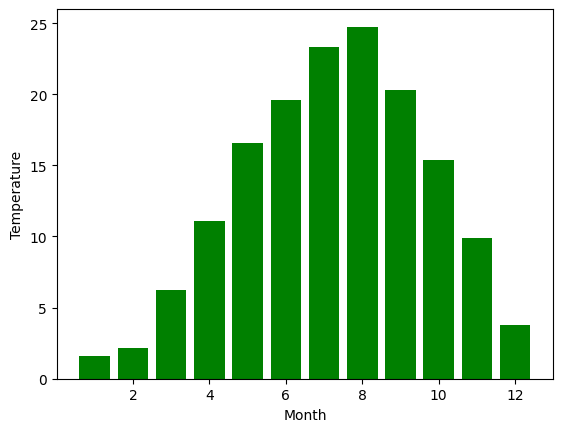

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather = pd.read_csv(weather_file, encoding='CP949')
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly = [ None for x in range(12) ]    # 달별로 구분된 12개의 None 값
monthly_wind = [ 0 for x in range(12) ]  # 각 달의 평균 풍속을 담을 리스트
for i in range(12) :
   monthly[i] = weather[ weather['month'] == i + 1 ] # 달별로 분리
  #  print(monthly[i])
   monthly_wind[i] = monthly[i]['평균기온'].mean()   # 개별 데이터 분석

months = np.arange(1, 13)   # 1에서 12월의 연속된 수를 생성
plt.bar(months, monthly_wind, color='green')
plt.xlabel('Month')
plt.ylabel('Temperature')

### 6.15 특정한 값에 기반하여 데이터를 묶어보자 : 그룹핑

In [ ]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path + 'weather.csv'

weather = pd.read_csv(weather_file, encoding='CP949')

weather['month'] = pd.DatetimeIndex(weather['일시']).month
print(weather)

              일시  평균기온  최대풍속  평균풍속  month
0     2010-08-01  28.7   8.3   3.4      8
1     2010-08-02  25.2   8.7   3.8      8
2     2010-08-03  22.1   6.3   2.9      8
3     2010-08-04  25.3   6.6   4.2      8
4     2010-08-05  27.2   9.1   5.6      8
...          ...   ...   ...   ...    ...
3648  2020-07-27  22.1   4.2   1.7      7
3649  2020-07-28  21.9   4.5   1.6      7
3650  2020-07-29  21.6   3.2   1.0      7
3651  2020-07-30  22.9   9.7   2.4      7
3652  2020-07-31  25.7   4.8   2.5      7

[3653 rows x 5 columns]


In [ ]:
# numeric_only = True라는 키워드 인자를 통해서 일시 열을 계산에서 제외
# 'month'를 기준으로 묶고 평균을 구함
monthly_means = weather.groupby('month').mean(numeric_only = True)
print(monthly_means)    # 그룹으로 묶인 'month' 데이터를 기준으로 평균값을 출력한다

            평균기온      최대풍속      평균풍속
month                               
1       1.598387  8.158065  3.757419
2       2.136396  8.225357  3.946786
3       6.250323  8.871935  4.390291
4      11.064667  9.305017  4.622483
5      16.564194  8.548710  4.219355
6      19.616667  6.945667  3.461000
7      23.328387  7.322581  3.877419
8      24.748710  6.853226  3.596129
9      20.323667  6.896333  3.661667
10     15.383871  7.766774  3.961613
11      9.889667  8.013333  3.930667
12      3.753548  8.045484  3.817097


In [ ]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path + 'weather.csv'

weather = pd.read_csv(weather_file, encoding='CP949')

weather['year'] = pd.DatetimeIndex(weather['일시']).year
print(weather)

              일시  평균기온  최대풍속  평균풍속  year
0     2010-08-01  28.7   8.3   3.4  2010
1     2010-08-02  25.2   8.7   3.8  2010
2     2010-08-03  22.1   6.3   2.9  2010
3     2010-08-04  25.3   6.6   4.2  2010
4     2010-08-05  27.2   9.1   5.6  2010
...          ...   ...   ...   ...   ...
3648  2020-07-27  22.1   4.2   1.7  2020
3649  2020-07-28  21.9   4.5   1.6  2020
3650  2020-07-29  21.6   3.2   1.0  2020
3651  2020-07-30  22.9   9.7   2.4  2020
3652  2020-07-31  25.7   4.8   2.5  2020

[3653 rows x 5 columns]


In [ ]:
y_means = weather.groupby('year').mean(numeric_only=True)
print(y_means)

           평균기온      최대풍속      평균풍속
year                               
2010  15.238562  8.205229  4.069281
2011  12.073425  8.355616  4.251233
2012  11.892896  7.794490  3.863912
2013  12.795068  7.859726  3.874795
2014  12.844110  7.458904  3.816438
2015  13.162466  7.694247  3.799449
2016  13.243443  7.963934  3.977869
2017  13.111233  8.001370  3.934795
2018  13.041644  8.158630  4.085479
2019  13.767671  7.796703  3.854396
2020  12.233333  7.897183  3.786385


### 6.16 그룹핑과 필터링

In [ ]:
y_max = weather.groupby('year').max(numeric_only=True)
print(y_max)

      평균기온  최대풍속  평균풍속
year                  
2010  28.9  16.9  10.3
2011  27.6  21.6  12.5
2012  28.3  17.5   9.2
2013  31.3  17.8  10.1
2014  27.5  16.1  11.2
2015  29.6  25.3  14.9
2016  28.5  18.0  13.3
2017  28.3  18.0  12.7
2018  30.5  26.0  12.0
2019  29.7  25.8  12.7
2020  25.7  22.2  11.6


In [ ]:
monthly_means['평균풍속'] >= 4.0

,평균풍속
month,
1,False
2,False
3,True
4,True
5,True
6,False
7,False
8,False
9,False


In [ ]:
monthly_means[ monthly_means['평균풍속'] >= 4.0 ]

,평균기온,최대풍속,평균풍속
month,,,
3,6.250323,8.871935,4.390291
4,11.064667,9.305017,4.622483
5,16.564194,8.548710,4.219355


### 6.17 데이터 구조를 변경하는 pivot()

In [ ]:
import pandas as pd

df = pd.DataFrame({'상품' : ['시계', '반지', '반지', '목걸이', '팔찌'],
                   '재질' : ['금', '은', '백금', '금', '은'],
                   '가격': [500000, 20000, 350000, 300000, 60000]})
df

,상품,재질,가격
0,시계,금,500000
1,반지,은,20000
2,반지,백금,350000
3,목걸이,금,300000
4,팔찌,은,60000


In [ ]:
new_df = df.pivot(index='상품', columns='재질', values='가격')
new_df.fillna(value=0)

재질,금,백금,은
상품,,,
목걸이,300000.0,0.0,0.0
반지,0.0,350000.0,20000.0
시계,500000.0,0.0,0.0
팔찌,0.0,0.0,60000.0


### 6.18 두 개의 데이터프레임을 하나로 합치는 concat()

In [ ]:
import pandas as pd

df_1 = pd.DataFrame( {'A' : ['a10', 'a11', 'a12'],
                      'B' : ['b10', 'b11', 'b12'],
                      'C' : ['c10', 'c11', 'c12']} ,
                      index = ['가', '나',  '다'] )

df_2 = pd.DataFrame( {'B' : ['b23', 'b24', 'b25'],
                      'C' : ['c23', 'c24', 'c25'],
                      'D' : ['d23', 'd24', 'd25']} ,
                      index = ['다', '라',  '마'] )

In [ ]:
df_1

,A,B,C
가,a10,b10,c10
나,a11,b11,c11
다,a12,b12,c12


In [ ]:
df_2

,B,C,D
다,b23,c23,d23
라,b24,c24,d24
마,b25,c25,d25


In [ ]:
df_3 = pd.concat( [df_1, df_2])
print(df_3)

     A    B    C    D
가  a10  b10  c10  NaN
나  a11  b11  c11  NaN
다  a12  b12  c12  NaN
다  NaN  b23  c23  d23
라  NaN  b24  c24  d24
마  NaN  b25  c25  d25


In [ ]:
df_4 = pd.concat( [df_1, df_2], join='inner')
print(df_4)

     B    C
가  b10  c10
나  b11  c11
다  b12  c12
다  b23  c23
라  b24  c24
마  b25  c25


### 6.19 테이블 데이터의 결합: concat()과 merge()

In [ ]:
print('left outer \n' , df_1.merge(df_2, how='left', on='B' ) )
print('right outer \n' ,df_1.merge(df_2, how='right', on='B' ) )
print('full outer \n' ,df_1.merge(df_2, how='outer', on='B' ) )
print('inner \n' ,df_1.merge(df_2, how='inner', on='B' ) )

left outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
right outer 
      A    B  C_x  C_y    D
0  NaN  b23  NaN  c23  d23
1  NaN  b24  NaN  c24  d24
2  NaN  b25  NaN  c25  d25
full outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
3  NaN  b23  NaN  c23  d23
4  NaN  b24  NaN  c24  d24
5  NaN  b25  NaN  c25  d25
inner 
 Empty DataFrame
Columns: [A, B, C_x, C_y, D]
Index: []


In [ ]:
df_3 = df_1.merge(df_2, how='outer', on='B')
print(df_3)

     A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
3  NaN  b23  NaN  c23  d23
4  NaN  b24  NaN  c24  d24
5  NaN  b25  NaN  c25  d25


In [ ]:
df_3 = df_1.merge(df_2, how = 'outer',
                  left_index = True, right_index = True )
print(df_3)

     A  B_x  C_x  B_y  C_y    D
가  a10  b10  c10  NaN  NaN  NaN
나  a11  b11  c11  NaN  NaN  NaN
다  a12  b12  c12  b23  c23  d23
라  NaN  NaN  NaN  b24  c24  d24
마  NaN  NaN  NaN  b25  c25  d25
